In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import time

In [3]:
#Implementing Jacobi Method
def Jacobi(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        temp=x.copy()
        for j in range(0,n):
            x[j,0]=(1/A[j,j])*(b[j,0]-A[j,:]@temp+A[j,j]*temp[j,0])
        if(np.linalg.norm(b-A@x)/np.linalg.norm(b)<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % np.linalg.norm(b-A@x)/np.linalg.norm(b),end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,np.linalg.norm(b-A@x)/np.linalg.norm(b)

#Implementing Gauss-Seidel Method
def GaussSeidel(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        for j in range(0,n):
            x[j,0]=(1/A[j,j])*(b[j,0]-A[j,:]@x+A[j,j]*x[j,0])
        temp=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(temp<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing SOR Method
def SOR(A,b,x0,w,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        for j in range(0,n):
            temp=(1/A[j,j])*(b[j,0]-A[j,:]@x+A[j,j]*x[j,0])
            x[j,0]=w*temp+(1-w)*x[j,0]
        tempr=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(tempr<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % tempr,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % tempr,end="")
    return x,i+1,tempr

#Implementing Steepest Descent Method
def SD(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        r=b-A@x
        alpha=(r.T@r)/(r.T@A@r)
        x=x+alpha*r
        temp=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(temp<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing Conjugate Gradient Method
def CG(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    r=b-A@x
    p=r.copy()
    for i in range(0,numiter):
        alpha=(r.T@r)/(p.T@A@p)
        x=x+alpha*p
        rnew=r-alpha*A@p
        beta=(rnew.T@rnew)/(r.T@r)
        p=rnew+beta*p
        r=rnew
        temp=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(temp<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing Conjugate Gradient Method with Preconditioning: Incomplete Cholesky
def CG_IC(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    r=b-A@x
    L=np.linalg.cholesky(A)
    for i in range(0,n):
        for j in range(0,i):
            if(A[i,j]==0):L[i,j]=0
    z=np.linalg.solve(L,r)
    p=z
    for i in range(0,numiter):
        alpha=(z.T@r)/(p.T@A@p)
        x=x+alpha*p
        rnew=r-alpha*A@p
        znew=np.linalg.solve(L,rnew)
        beta=(rnew.T@znew)/(r.T@z)
        p=znew+beta*p
        r=rnew;z=znew
        temp=np.linalg.norm(r)
        if(temp<tol):break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing Conjugate Gradient Method with Preconditioning: SSOR
def CG_SSOR(A,b,x0,w,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    r=b-A@x
    U=np.triu(A);L=np.tril(A);D=np.diag(np.diag(A))
    z=np.linalg.solve(U+(1/w)*D,D@np.linalg.solve(L+(1/w)*D,((2-w)/(w))*r))
    p=z
    for i in range(0,numiter):
        alpha=(z.T@r)/(p.T@A@p)
        x=x+alpha*p
        rnew=r-alpha*A@p
        znew=np.linalg.solve(U+(1/w)*D,D@np.linalg.solve(L+(1/w)*D,((2-w)/(w))*r))
        beta=(rnew.T@znew)/(r.T@z)
        p=znew+beta*p
        r=rnew;z=znew
        temp=np.linalg.norm(r)
        if(temp<tol):break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

def poisson(calc_method,N,maxiter,tol,w=1):
    start = time.time()
    #Formulating D
    D=np.zeros([(N-1)**2,(N-1)**2])
    for i in range(0,N-2):
        D[(N-1)*(i+1):(N-1)*(i+2),(N-1)*i:(N-1)*(i+1)]=np.identity(N-1,dtype=float)*(-1)
        D[(N-1)*i:(N-1)*(i+1),(N-1)*(i+1):(N-1)*(i+2)]=np.identity(N-1,dtype=float)*(-1)
    tempdiagD=np.identity(N-1,dtype=float)*(4)
    for i in range(0,N-2):
        tempdiagD[i+1,i]=-1;tempdiagD[i,i+1]=-1
    for i in range(0,N-1):
        D[(N-1)*i:(N-1)*(i+1),(N-1)*i:(N-1)*(i+1)]=tempdiagD
        
    #Formulating b
    b=np.zeros([(N-1)**2,1])
    for i in range(0,N-1):
        for j in range(0,N-1):
            b[i*(N-1)+j,0]=((1/N)**2)*20*((np.pi)**2)*np.sin(4*np.pi*(i+1)/(N))*np.sin(2*np.pi*(j+1)/(N))

    #Formulating boundary
    boundary=np.zeros([(N-1)**2,1])
    for i in range(1,N-2):
        boundary[i,0]=0
    boundary[0,0]=0;boundary[N-2,0]=np.sin(4*np.pi*(1)/(N))*np.sin(2*np.pi*(N)/(N))
    for i in range(1,N-2):
        boundary[(N-1)*i]=0;boundary[(N-1)*(i+1)-1]=np.sin(4*np.pi*(i+1)/(N))*np.sin(2*np.pi*(N)/(N))
    for i in range(1,N-2):
        boundary[(N-1)*(N-2)+i,0]=np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(i+1)/(N))
    boundary[(N-1)*(N-2),0]=0+np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(1)/(N))
    boundary[(N-1)**2-1,0]=np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(N-1)/(N))+np.sin(4*np.pi*(N-1)/(N))*np.sin(2*np.pi*(N)/(N))

    #Formulating bhat
    bhat=b+boundary

    #Solving the system using Jacobi iteration
    x0=np.zeros([np.shape(D)[0],1])
    if(calc_method=='Jacobi'):x,iter,relerr=Jacobi(D,bhat,x0,tol,maxiter)
    elif(calc_method=='GaussSeidel'):x,iter,relerr=GaussSeidel(D,bhat,x0,tol,maxiter)
    elif(calc_method=='SOR'):x,iter,relerr=SOR(D,bhat,x0,1.5,tol,maxiter)
    elif(calc_method=='SteepestDescent'):x,iter,relerr=SD(D,bhat,x0,tol,maxiter)
    elif(calc_method=='ConjugateGradient'):x,iter,relerr=CG(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preIC_ConjugateGradient'):x,iter,relerr=CG_IC(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preSSOR_ConjugateGradient'):x,iter,relerr=CG_SSOR(D,bhat,x0,w,tol,maxiter)
    else:print('Please choose the correct method')
    z=np.zeros([N+1,N+1])
    end = time.time()
    print('\nTime taken to solve the '+calc_method+str(N)+' system is',end-start,'seconds')

    #Starting to plot the result
    #inner points
    for i in range(1,N):
        z[i,1:N]=x[(i-1)*(N-1):(i)*(N-1),0].T
    #boundary points
    for i in range(0,N+1):
        z[0,i]=np.sin(4*np.pi*(i)/(N))*np.sin(2*np.pi*(0)/(N))
        z[N,i]=np.sin(4*np.pi*(i)/(N))*np.sin(2*np.pi*(N)/(N))
        z[i,0]=np.sin(4*np.pi*(0)/(N))*np.sin(2*np.pi*(i)/(N))
        z[i,N]=np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(i)/(N))
    
    #Initial Setup
    xini=0
    xend=1
    yini=0
    yend=1
    tempx=np.linspace(xini, xend, N+1)
    tempy=np.linspace(yini, yend, N+1)
    x,y=np.meshgrid(tempx, tempy)

    fig,ax=plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(15, 15)
    surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                            linewidth=0,antialiased=False)
    
    fig.colorbar(surf,shrink=0.5,aspect=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.set_title(calc_method+str(N), fontsize=30)
    ax.view_init(20, 20)
    plt.show()


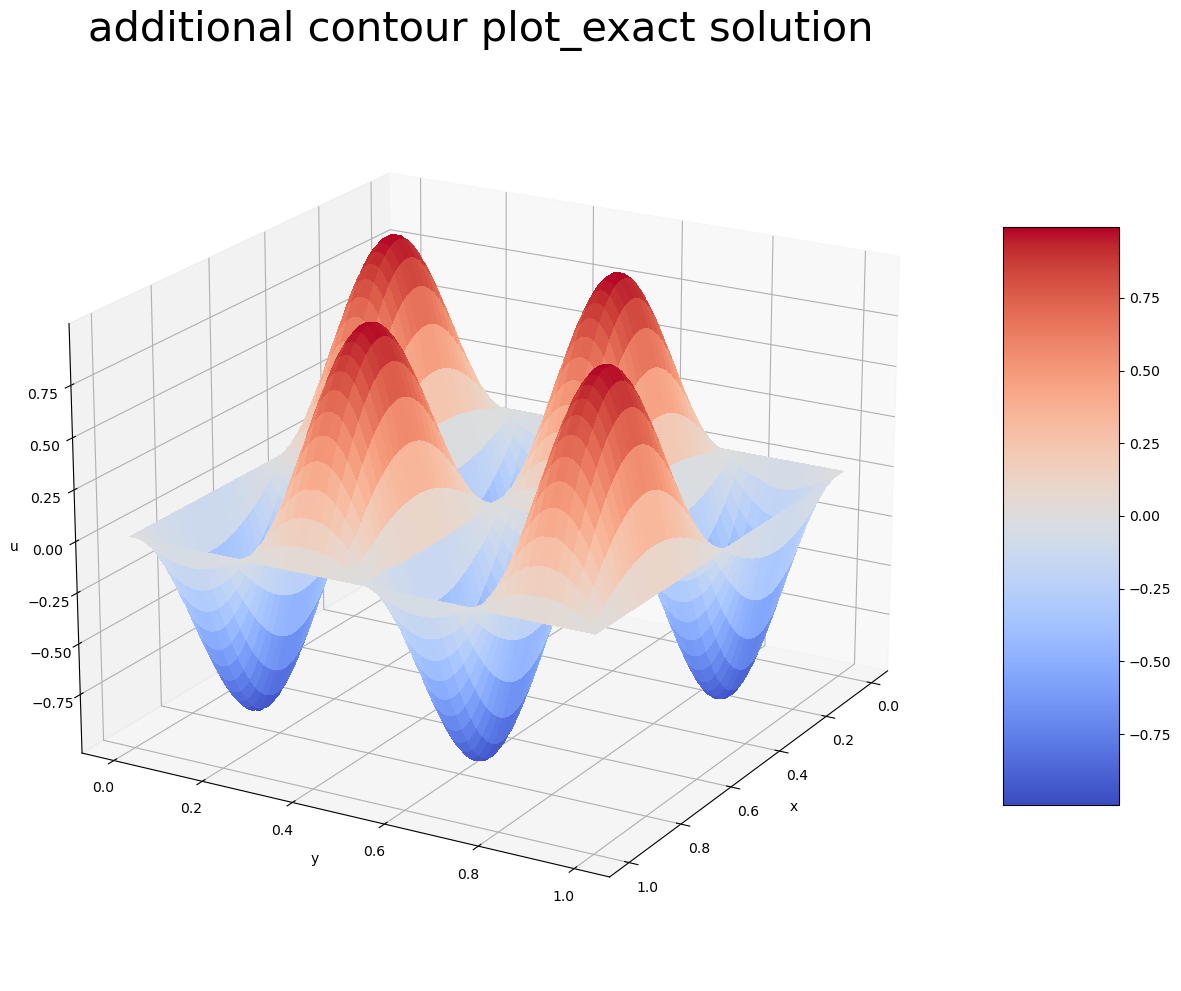

In [4]:
def exact_solution(x,y):
    return np.sin(4*np.pi*y)*np.sin(2*np.pi*x)

x=np.linspace(0,1,300)
y=np.linspace(0,1,300)
X,Y=np.meshgrid(x,y)
Z=exact_solution(X,Y)

fig,ax=plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(15, 15)
surf=ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,
                        linewidth=0,antialiased=False)
    
fig.colorbar(surf,shrink=0.5,aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('additional contour plot_exact solution', fontsize=30)
ax.view_init(20,30)
plt.show()

Iteration Status: 1 , Residual Status: 9.465130215536E-15
Time taken to solve the SteepestDescent32 system is 0.011827945709228516 seconds


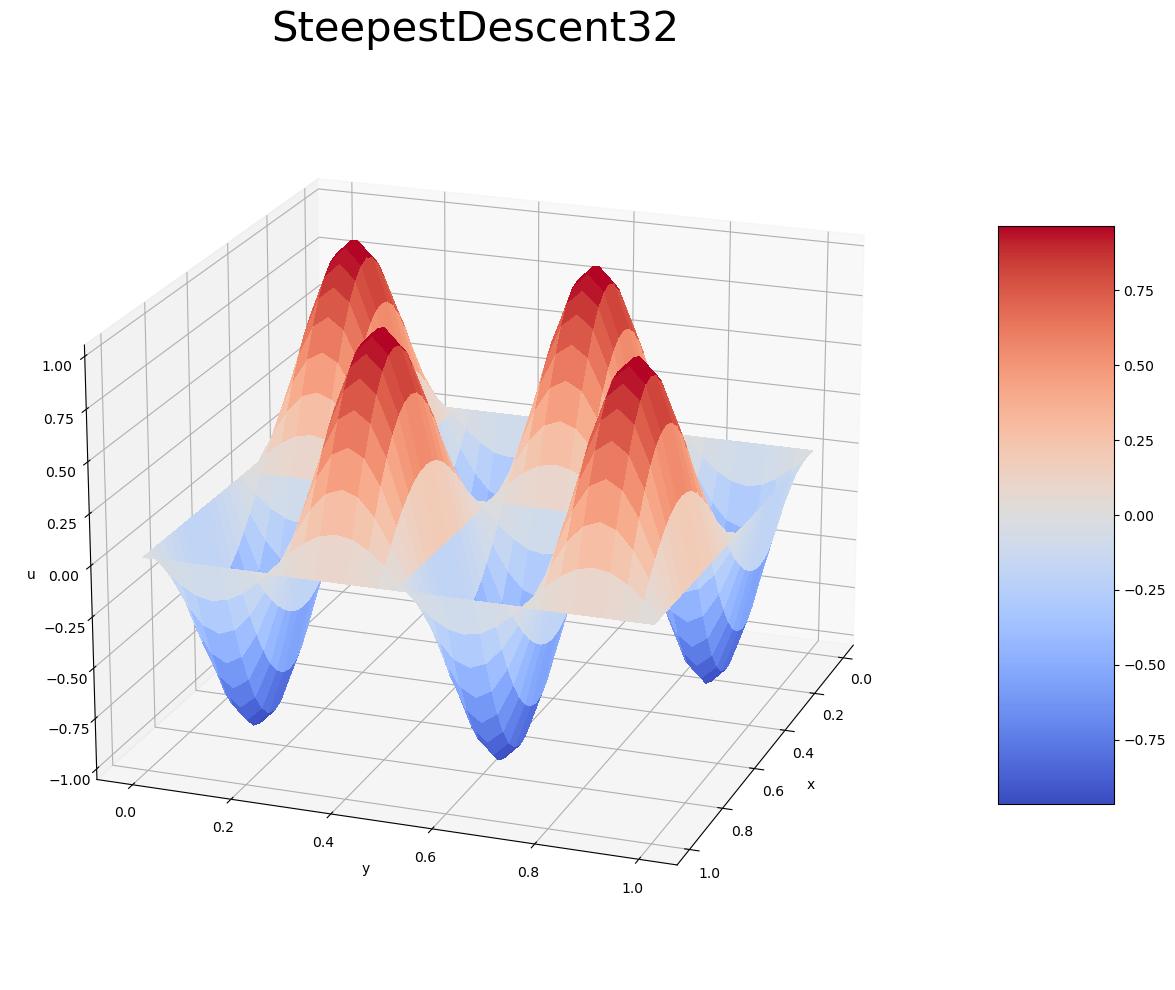

Iteration Status: 100 , Residual Status: 5.467454063208E-15
Maximum iteration has achieved, without achieving the intended convergence, Residual Status: 5.467454063208E-15
Time taken to solve the SteepestDescent64 system is 0.9677619934082031 seconds


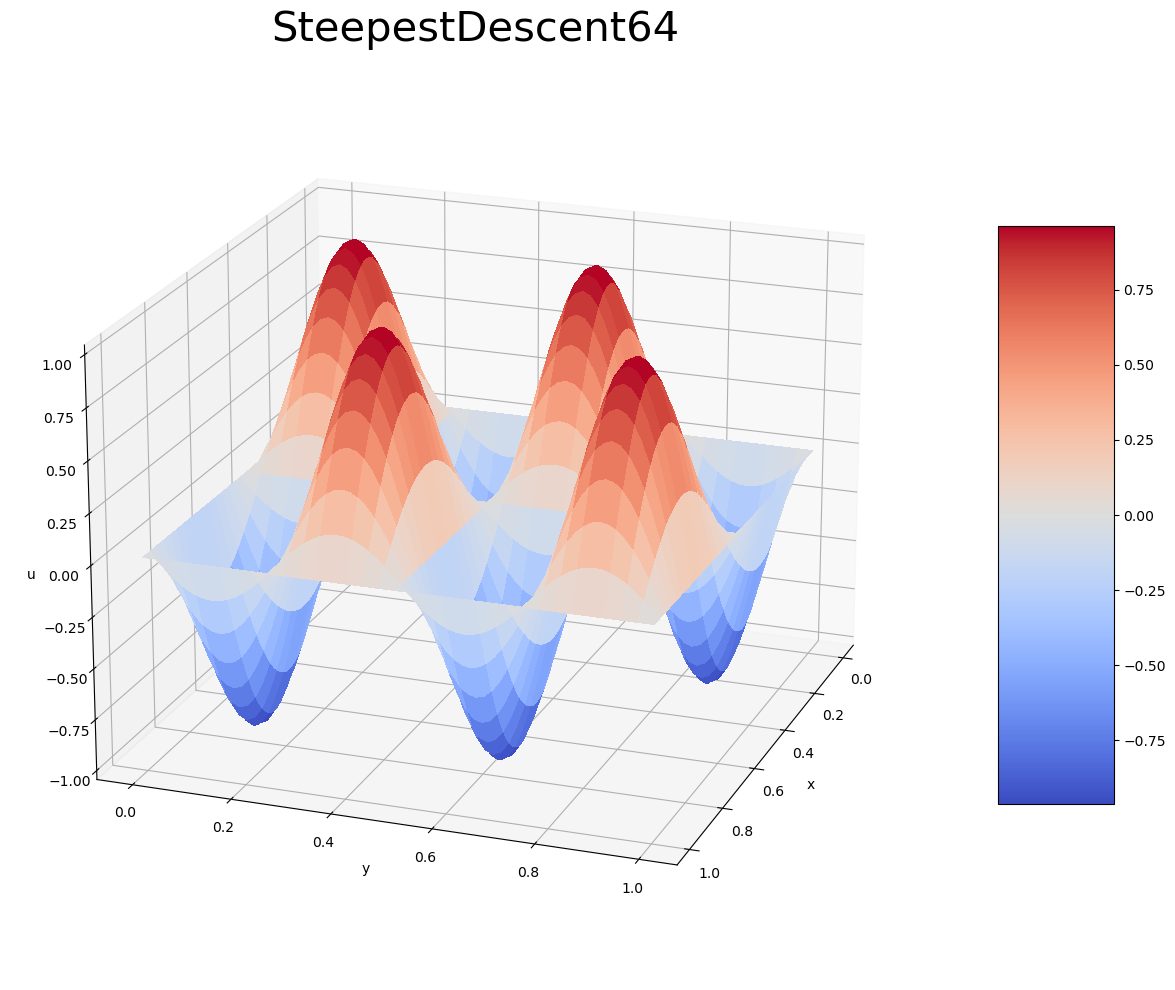

Iteration Status: 100 , Residual Status: 2.442524480872E-14
Maximum iteration has achieved, without achieving the intended convergence, Residual Status: 2.442524480872E-14
Time taken to solve the SteepestDescent128 system is 63.05472207069397 seconds


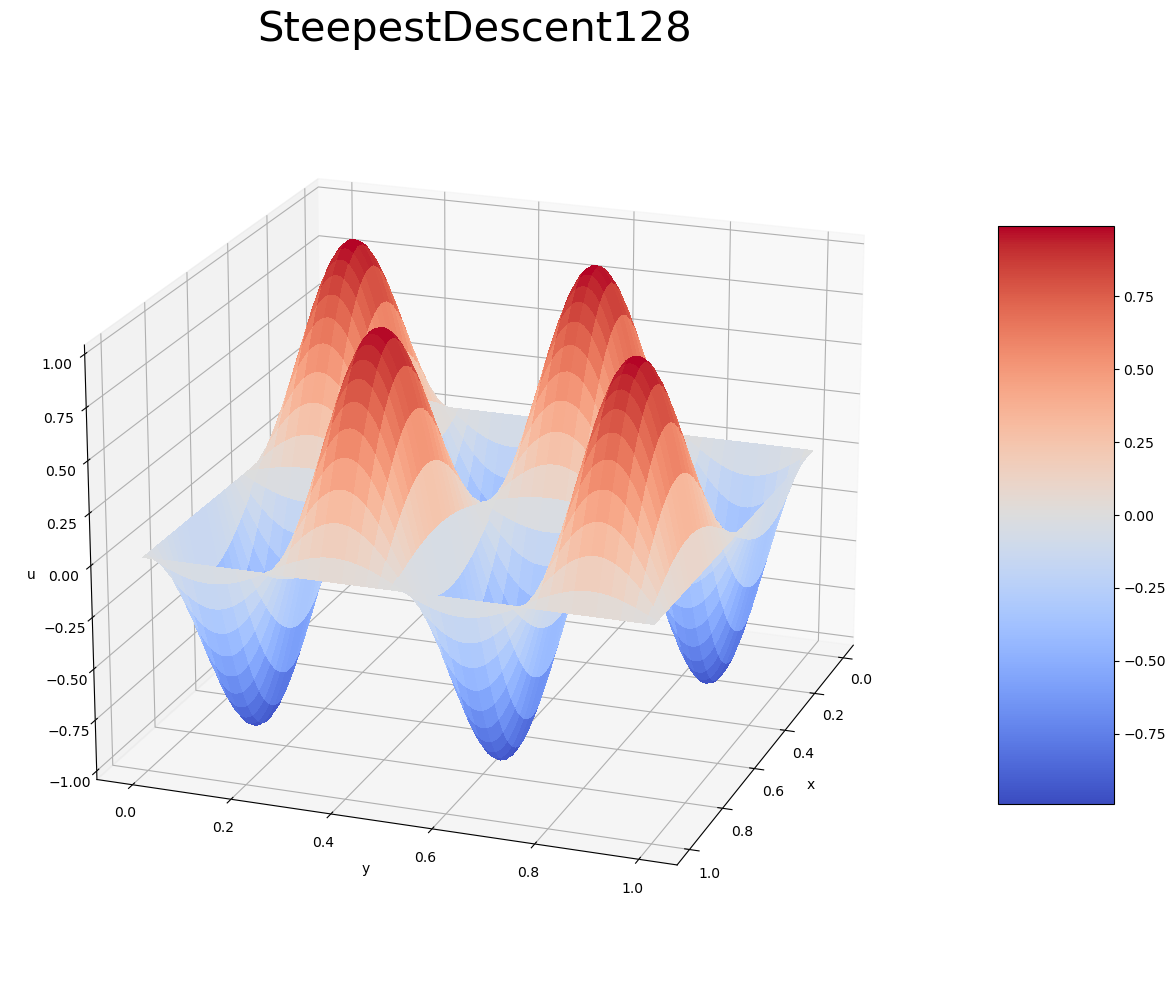

Iteration Status: 1 , Residual Status: 9.465130215536E-15
Time taken to solve the ConjugateGradient32 system is 0.010344982147216797 seconds


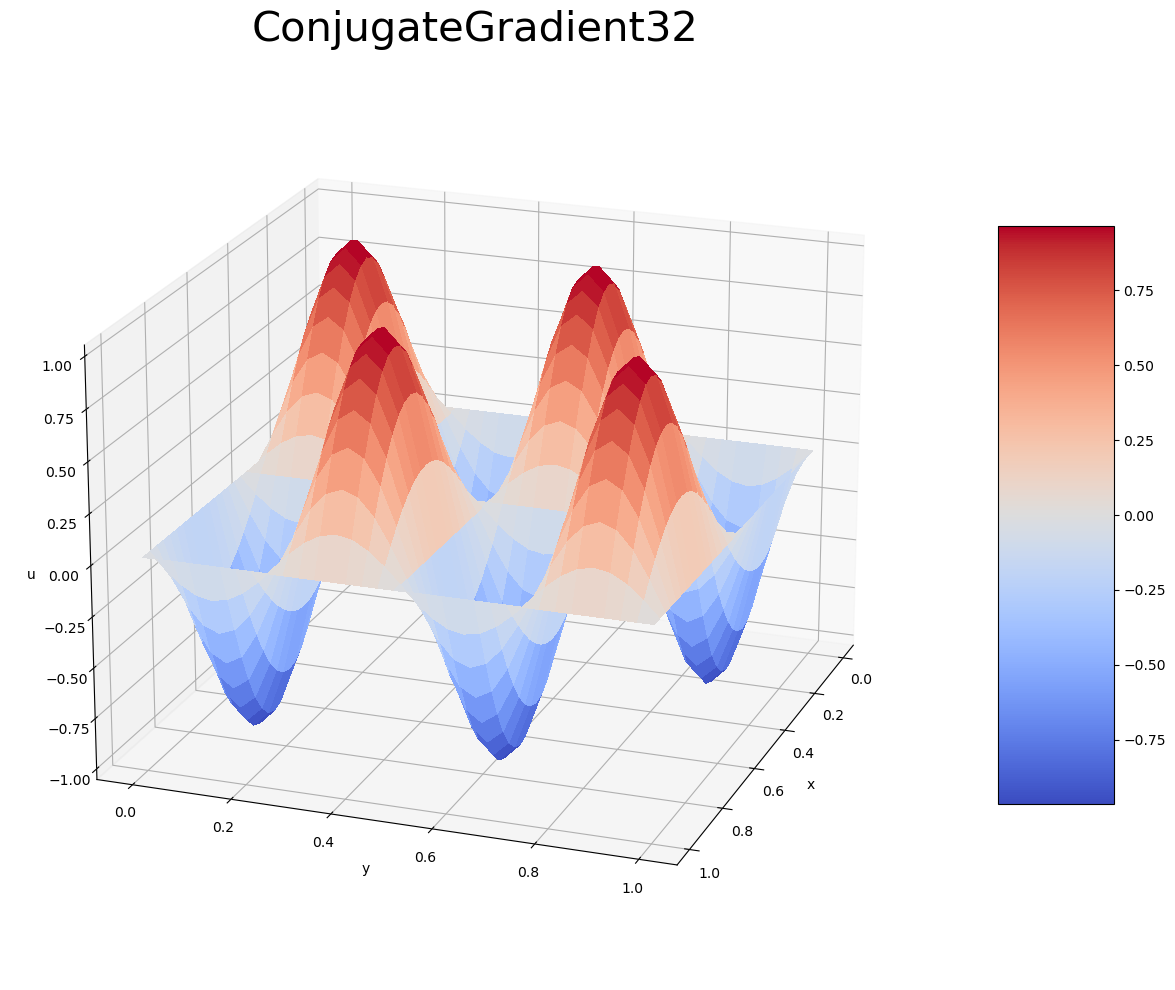

Iteration Status: 100 , Residual Status: 1.876384955523E-14
Maximum iteration has achieved, without achieving the intended convergence, Residual Status: 1.876384955523E-14
Time taken to solve the ConjugateGradient64 system is 1.7134768962860107 seconds


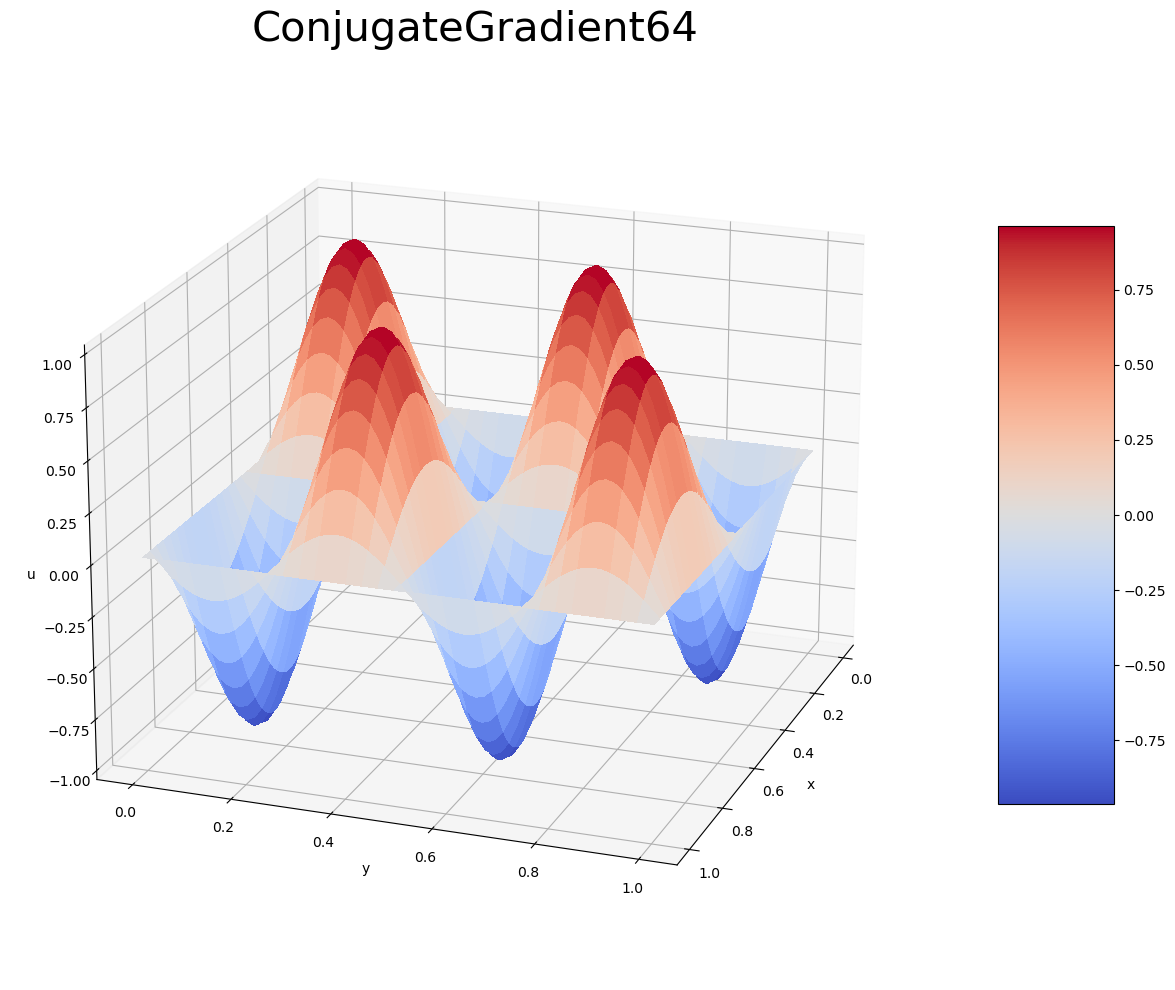

Iteration Status: 3 , Residual Status: 1.297282361446E-13

In [5]:
poisson("SteepestDescent",32,100,0.5e-14)
poisson("SteepestDescent",64,100,0.5e-14)
poisson("SteepestDescent",128,100,0.5e-14)
poisson("ConjugateGradient",32,100,0.5e-14)
poisson("ConjugateGradient",64,100,0.5e-14)
poisson("ConjugateGradient",128,100,0.5e-14)
poisson("preIC_ConjugateGradient",32,100,0.5e-14)
poisson("preIC_ConjugateGradient",64,100,0.5e-14)
poisson("preIC_ConjugateGradient",128,100,0.5e-14)
poisson("preSSOR_ConjugateGradient",32,100,0.5e-14,1)
poisson("preSSOR_ConjugateGradient",64,100,0.5e-14,1)
poisson("preSSOR_ConjugateGradient",128,100,0.5e-14,1)

1. Steepest Gradient Method: In our intuition, setting grid in dense way would increase the accuracy. But the result shows some example that setting grid in a dense way can actually be harmful to the iterative calculation. Except for the 32 case, 64 and 128 cases did not converged below tolerence value. Also for the 128 mesh, it took so much time to simply calculate the iteration. From this reason, numerical science field, such as computational fluid dynamics conduct a 'grid refinement test' in order to find the specific grid,vwhich guarantees both the convergence, and the rapidiness of convergece rate. 

2. Conjugate Gradient Method: In our intuition, setting grid in dense way would increase the accuracy. But the result shows some example that setting grid in a dense way can actually be harmful to the iterative calculation. Except for the 32 case, 64 and 128 cases did not converged below tolerence value. Also for the 128 mesh, it took so much time to simply calculate the iteration. From this reason, numerical science field, such as computational fluid dynamics conduct a 'grid refinement test' in order to find the specific grid,vwhich guarantees both the convergence, and the rapidiness of convergece rate. Comparing with the Jacobi method, 32, 64, and 128 case took more time than the Steepest Gradient. This seems to be result of 'Too small tolerance'. Also, 64 method strucked weird problem which made the early termination without getting the result. 

3. PreCG_IC Method: In our intuition, setting grid in dense way would increase the accuracy. But the result shows some example that setting grid in a dense way can actually be harmful to the iterative calculation. Except for the 32 case, 64 and 128 cases did not converged below tolerence value. Also for the 128 mesh, it took so much time to simply calculate the iteration. From this reason, numerical science field, such as computational fluid dynamics conduct a 'grid refinement test' in order to find the specific grid,vwhich guarantees both the convergence, and the rapidiness of convergece rate. In this case, 128 case took so much time, that the result did not came out even if the calculation waqs held for 12 hours. This seems to be result of 'Too small tolerance'

4. PreCG_SSOR Method: In our intuition, setting grid in dense way would increase the accuracy. But the result shows some example that setting grid in a dense way can actually be harmful to the iterative calculation. Except for the 32 case, 64 and 128 cases did not converged below tolerence value. Also for the 128 mesh, it took so much time to simply calculate the iteration. From this reason, numerical science field, such as computational fluid dynamics conduct a 'grid refinement test' in order to find the specific grid,vwhich guarantees both the convergence, and the rapidiness of convergece rate. In this case, 64 and 128 case took so much time, that the result did not came out even if the calculation waqs held for 12 hours. This seems to be result of 'Too small tolerance'

